# Estimating consumption spending US

### Data used:
Consumption spending, nominal = FRED/DHCERC1Q027SBEA
Consumption deflator = FRED/CONSDEF
Interest rate/discount rate = FRED/INTDSRUSM193N
Unemployment rate = FRED/UNRATE

### Limitations

This model doesn't include household income as that's being calculated elsewhere, and can be added in later.

So the results of the model, aren't tooooooo insightful.

In [1]:
# Imports needed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
# read data from CSV
data = pd.read_csv('consumption_data.csv')

In [3]:
# Convert consumption into constant 2005 US$ dollars
const_data = data.assign(const_consumption = lambda x: (x['consumption'] / (x['deflator'] / 100)))
const_data.tail()

,date,consumption,deflator,interestRate,unemployment,const_consumption
219,1/01/1960,146.5,14.835452,4.00,6.8,987.499403
220,1/10/1959,144.6,14.756015,3.83,6.3,979.939367
221,1/07/1959,141.6,14.683027,3.50,5.5,964.378803
222,1/04/1959,138.5,14.591905,2.92,5.2,949.156399
223,1/01/1959,135.5,14.565557,2.50,5.1,930.276817


In [4]:
# Reverse data for visualisation
reversed_data = const_data[::-1]

In [5]:
reversed_data.columns.values

array(['date', 'consumption', 'deflator', 'interestRate', 'unemployment',
       'const_consumption'], dtype=object)

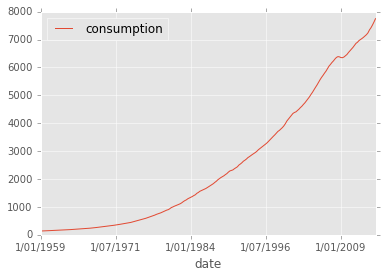

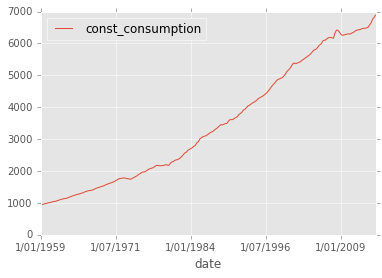

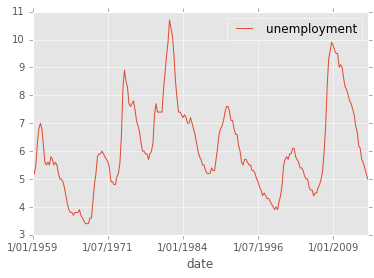

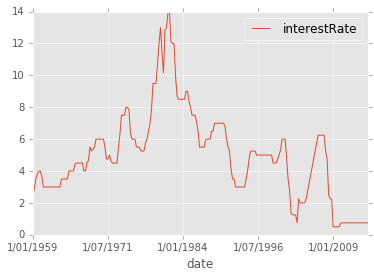

In [6]:
reversed_data.plot(x='date', y='consumption')
reversed_data.plot(x='date', y='const_consumption')
reversed_data.plot(x='date', y='unemployment')
reversed_data.plot(x='date', y='interestRate')

Consumption plotted with Interest Rates
Constant consumption plotted with interest rates
Consumption plotted with unemployment
Constant consumption plotted with enemployment


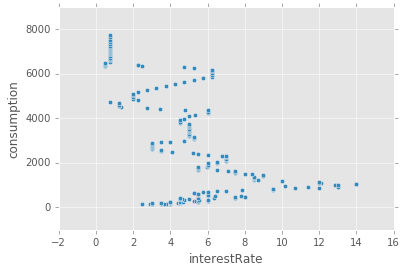

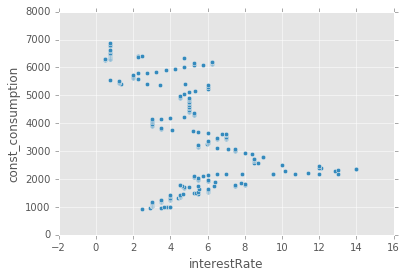

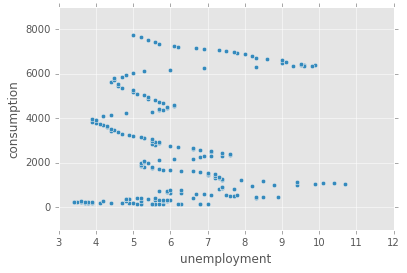

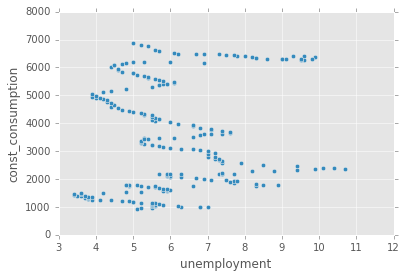

In [7]:
# Explores variables against consumption using scatter plots

# Consumption plotted with Interest Rates
print "Consumption plotted with Interest Rates"
reversed_data.plot(x='interestRate', y='consumption', kind='scatter')

print "Constant consumption plotted with interest rates"
reversed_data.plot(x='interestRate', y='const_consumption', kind='scatter')
                   
# Consumption plotted with unemployment
print "Consumption plotted with unemployment"
reversed_data.plot(x='unemployment', y='consumption', kind='scatter')
                   
print "Constant consumption plotted with enemployment"
reversed_data.plot(x='unemployment', y='const_consumption', kind='scatter')

## Correlation Tables

In [8]:
reversed_data.corr()

,consumption,deflator,interestRate,unemployment,const_consumption
consumption,1.000000,0.972227,-0.511916,0.158441,0.983519
deflator,0.972227,1.000000,-0.377717,0.206664,0.991591
interestRate,-0.511916,-0.377717,1.000000,0.250106,-0.436379
unemployment,0.158441,0.206664,0.250106,1.000000,0.142536
const_consumption,0.983519,0.991591,-0.436379,0.142536,1.000000


# Regressions on data

## K-nearest neighbours
This first regression, gets inputs and outputs the estimated consumption value in $. It only predicts a stationary point, and doesn't estimate the change in consumption over time.

In [9]:
from sklearn.neighbors import KNeighborsRegressor

x = np.array(reversed_data['interestRate'])
x_neigh = x.reshape(len(x), 1)
y = np.array(reversed_data['const_consumption'])
y_neigh = y.reshape(len(y), 1)

neigh = KNeighborsRegressor(n_neighbors=1)
neigh.fit(x_neigh, y_neigh)
neigh.get_params()

prediction1 = neigh.predict(1.5)
prediction2 = neigh.predict(9)
print "With an interest rate of 1.5 percent, consumption is predicted to be %s." %str(prediction1)
print "With an interest rate of 9 percent, consumption is predicted to be %s." %str(prediction2)

With an interest rate of 1.5 percent, consumption is predicted to be [[ 5411.33501615]].
With an interest rate of 9 percent, consumption is predicted to be [[ 2803.21915373]].


## Linear regressions
Uses a simple and then multivariable linear regression. These results aren't terribly helpful as the data is missing income levels.

### Simple linear regression

In [15]:
# Simple linear regression, exploring effect of interest rates on consumption spending
# consumption = intercept + slope(interest rates) + std_err

from statsmodels.formula.api import ols

simple_model = ols('const_consumption ~ interestRate', reversed_data).fit()
print simple_model.summary()

                            OLS Regression Results                            
Dep. Variable:      const_consumption   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     52.22
Date:                Mon, 02 Jan 2017   Prob (F-statistic):           7.89e-12
Time:                        10:38:05   Log-Likelihood:                -1982.5
No. Observations:                 224   AIC:                             3969.
Df Residuals:                     222   BIC:                             3976.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept     4922.3010    231.583     21.255   

### Multiple linear regression

In [17]:
# multiple regression
# consumption = intercept + b(const_consumption) + c(unemployment) + stderr

model = ols('const_consumption ~ interestRate + unemployment', reversed_data).fit()
print model.summary()

                            OLS Regression Results                            
Dep. Variable:      const_consumption   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     38.42
Date:                Mon, 02 Jan 2017   Prob (F-statistic):           4.79e-15
Time:                        10:40:10   Log-Likelihood:                -1972.7
No. Observations:                 224   AIC:                             3951.
Df Residuals:                     221   BIC:                             3962.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept     3206.8032    442.282      7.251   